# Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Contents

1. [Starting and Understanding the Data](#1)
2. [Data Visualization](#2)
    - Boxplot
    - Pairplot
    - Heatmap
3. [Scaling](#3)
    - Standard Scaler
4. [Evaluating Variables, Correlation, and using RFC](#4)
5. [Using RandomForestClassifier, Confusion Matrix, and Accuracy Score](#5)

<a id="1"></a> <br>
## 1) Starting and Understanding the Data

In [583]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report

In [513]:
od.download('https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database')

Skipping, found downloaded files in ".\pima-indians-diabetes-database" (use force=True to force download)


In [514]:
df_diabetes = pd.read_csv('pima-indians-diabetes-database\diabetes.csv')

In [515]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [516]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [517]:
df_diabetes['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [518]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [519]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Describe Analysis

<img src='diabetes_describe.PNG'>

<p style='font-family: "Times New Roman"; font-size:14px;'> Glucose, BloodPressure, SkinThickness, Insulin, and BMI should not have a minimum value of 0. Indicates that some values may be missing </p>

## Therefore, we need to change values of 0 to NaN

* Cannot drop these NaN values after because they are in different rows. Therefore, by doing so, all rows would get dropped.

In [520]:
df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [521]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [522]:
df_diabetes[df_diabetes.isnull().any(axis=1)].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


## Check new mean after changing to NaN

In [523]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## There is some ambiguity when changing missing values to NaN. Instead, we should replace all missing values with the median

In [524]:
df_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in df_col:
    df_diabetes[col] = df_diabetes[col].replace(np.NaN, df_diabetes[col].median())

In [525]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [526]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<a id="2"></a> <br>
## 2) Data Visualization

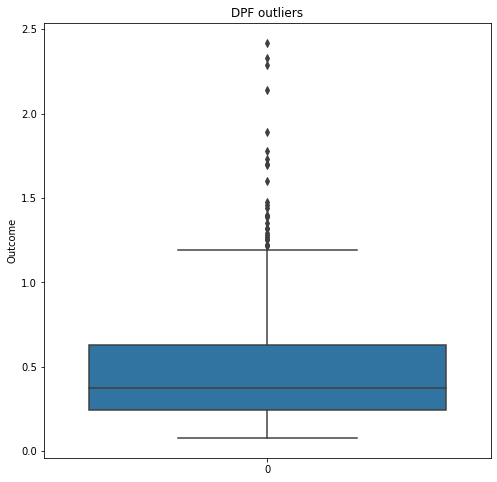

In [527]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.boxplot(data=df_diabetes['DiabetesPedigreeFunction'], orient='v')
plt.xlabel(''), plt.ylabel('Outcome'), plt.title('DPF outliers')

plt.show()

## Plotting Outliers for every column

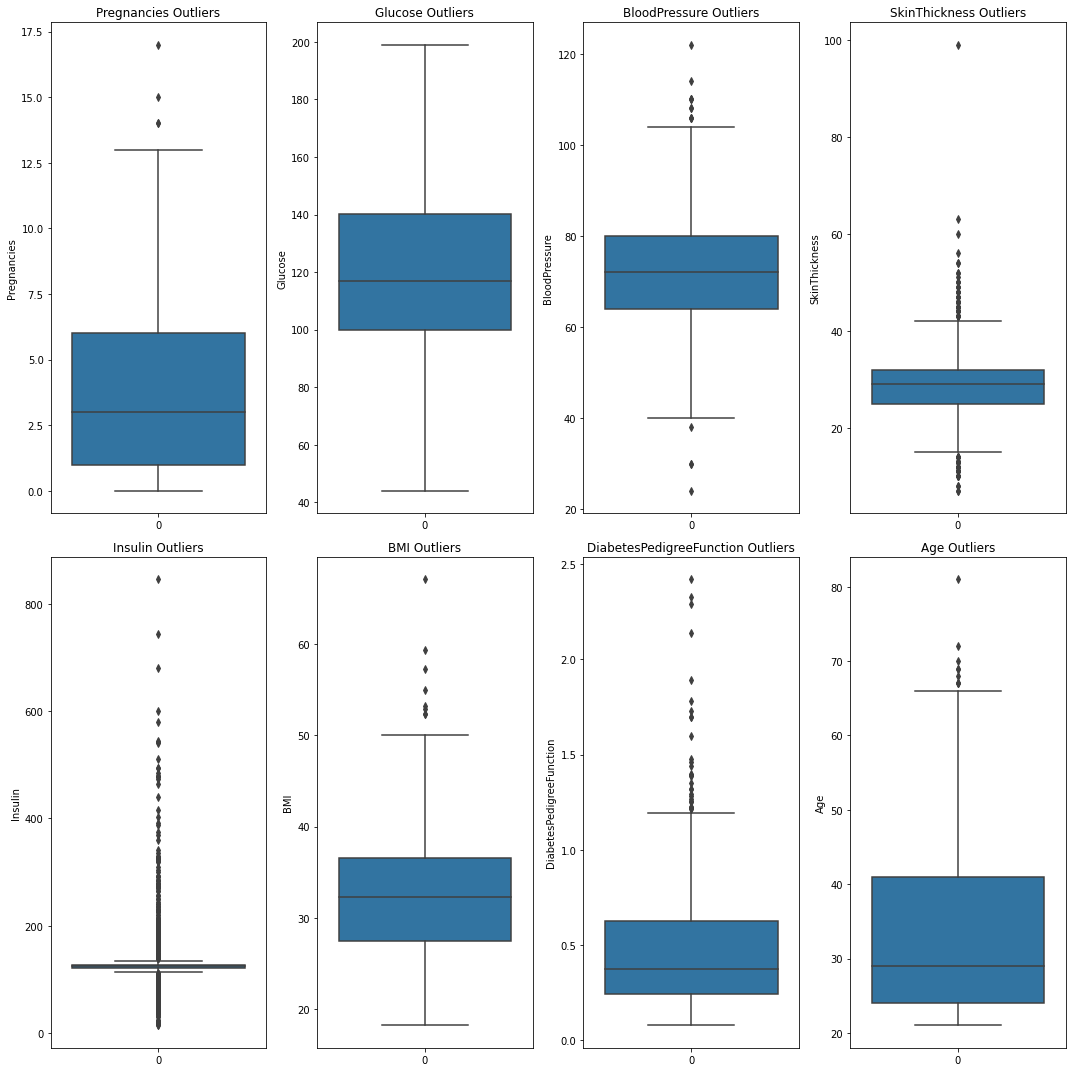

In [528]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(df_diabetes.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_diabetes[column], orient='v')
    plt.xlabel(''), plt.ylabel(column), plt.title(f'{column} Outliers')

plt.tight_layout()
plt.show()

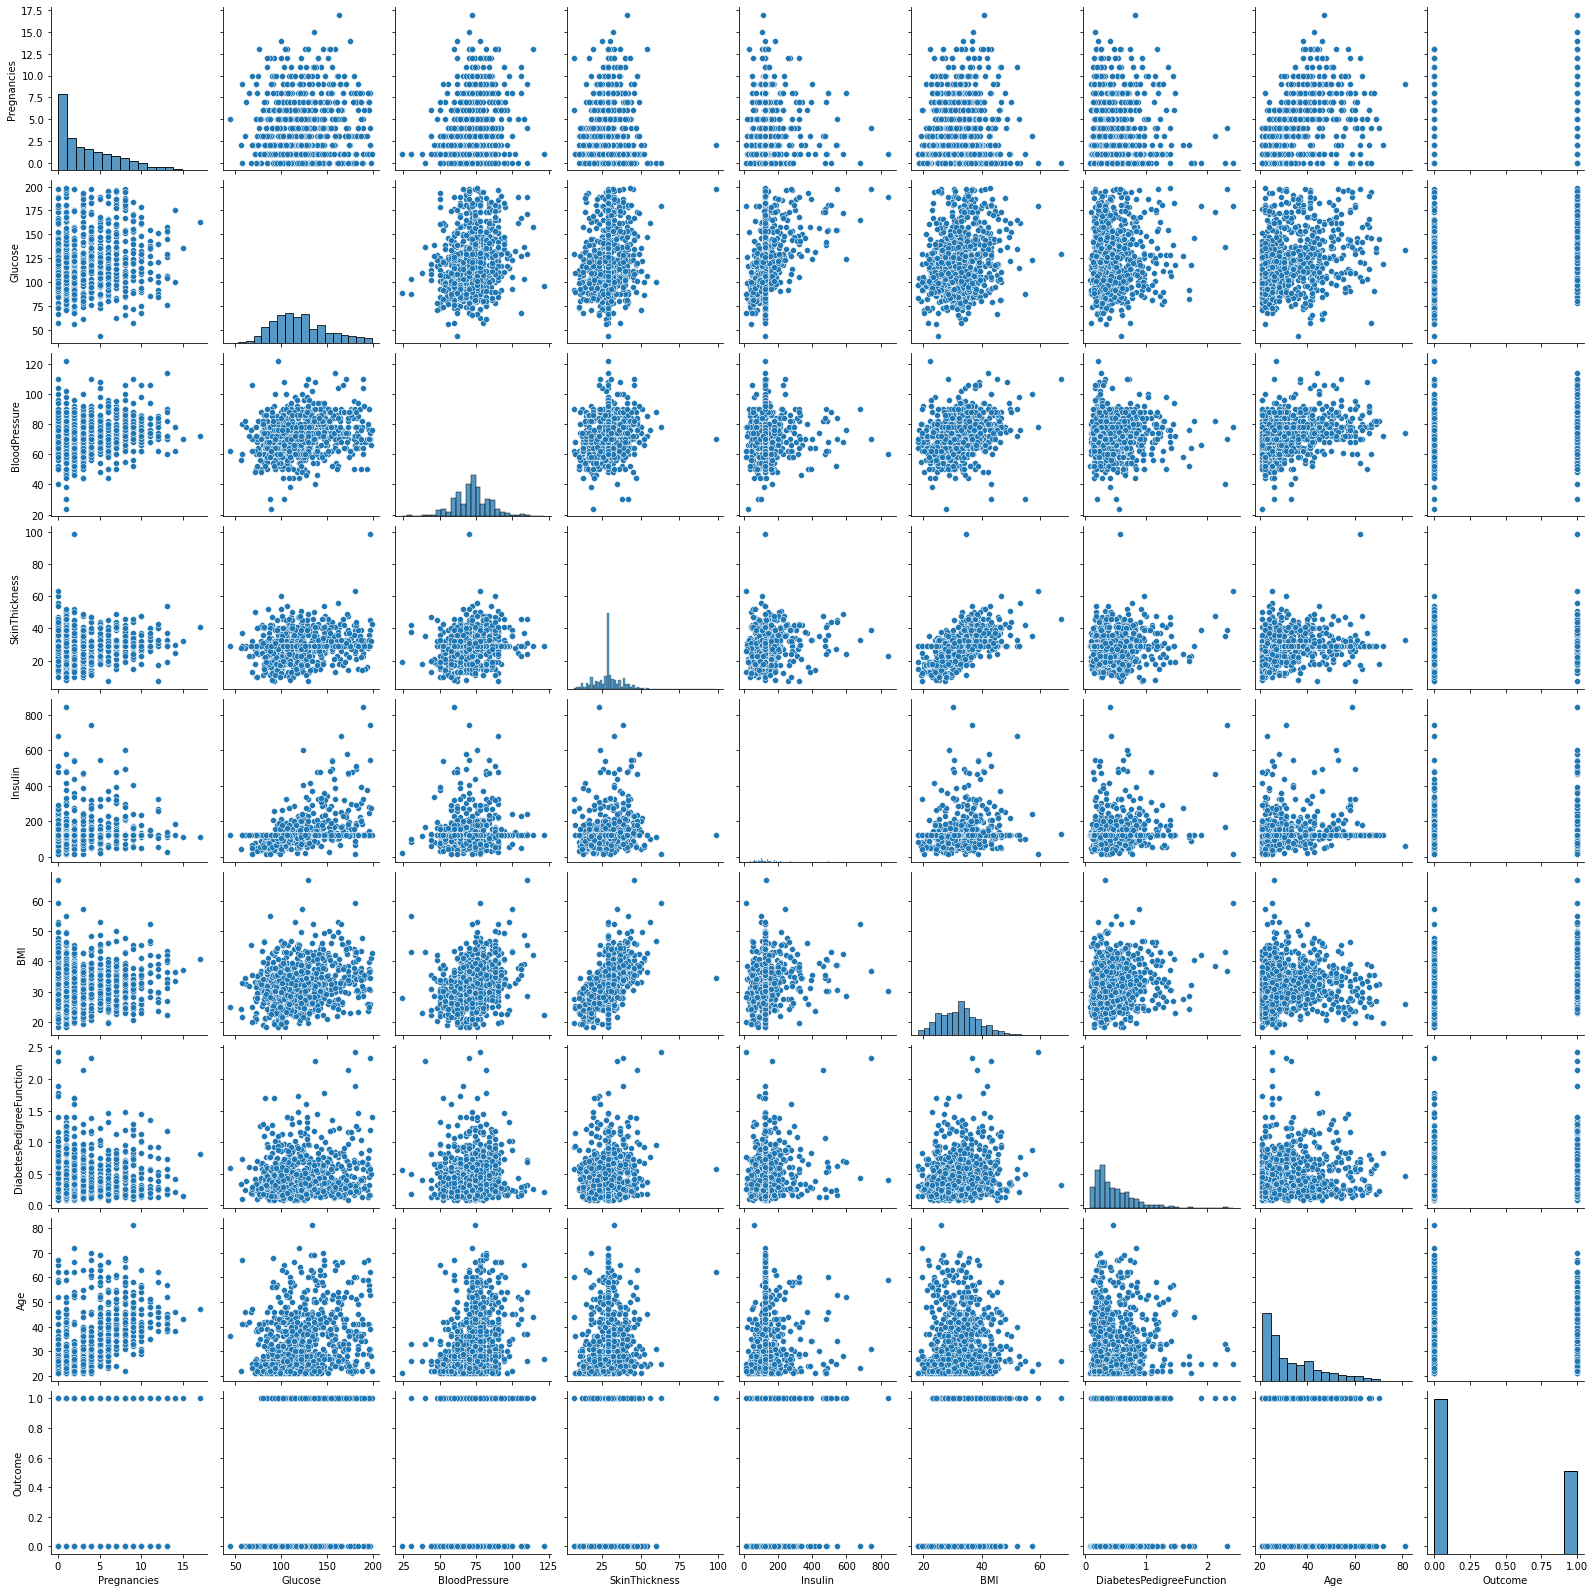

In [529]:
sns.pairplot(data=df_diabetes)

<h1 style='font-size:20px; font-family: sans-serif; font-weight: bold'>Insight: </h1>
<br> 

<table align='left'>
    <tr>
        <th> Positive Correlation </th>
        <th> No Correlation </th>
    </tr>
    <tr> 
        <td> Insulin, Glucose </td>
        <td> Pregnancies </td>
    </tr>
    <tr>
        <td> BMI, Skinthickness </td>
        <td> Outcome </td>
    </tr>
    <tr>
        <td> Skinthickness, BMI </td>
    </tr>
    <tr>
        <td> BloodPressure, BMI </td>
    </tr>
</table>

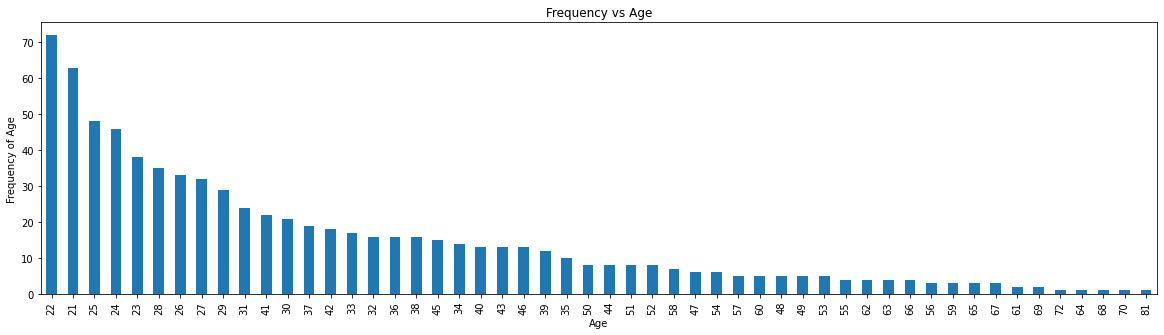

In [530]:
plt.figure(figsize=(20, 5))

ax = df_diabetes['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age'), plt.ylabel('Frequency of Age'), plt.title('Frequency vs Age')

plt.show()

In [531]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [533]:
df_train.shape

(537, 9)

<a id="3"></a> <br>
## 3) Scaling

Scaling is important to (1) normalize data and (2) reduce size of coefficients. Since we are going to perform Linear Regression, rescaling is vital.

There are two types:
* MinMax: Where the maximum value of a column is set to 1, the minimum is set to 0, and the rest is changed to some value between 1-0 in proportion to their original value. 

Expressed by: $x$ - $x_{min}$ / ($x_{max}$ - $x_{min}$)


* StandardScaler: If variables are measured at different scales, then they do not contribute equally to fit the model. Some bias can be created. In order to deal with that, we standardize the data by taking each point and subtracting the mean over the stdev. 

Expressed by: ($x$ - <b>mean</b>) / <b>stdev</b>

In [534]:
scaler = StandardScaler()

standard = scaler.fit_transform(df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [535]:
df_diabetes.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [536]:
df_standard = pd.DataFrame(standard, columns=df_diabetes.columns[:-1])

In [537]:
df_standard.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [538]:
df_standard = pd.concat([df_standard, df_diabetes.iloc[:, -1]], axis=1)

In [587]:
df_standard.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


## Splitting data into Train-Test-Split to evaluate accuracy without overfitting

In [562]:
df_train, df_test = train_test_split(df_standard, random_state=42, test_size=0.3)

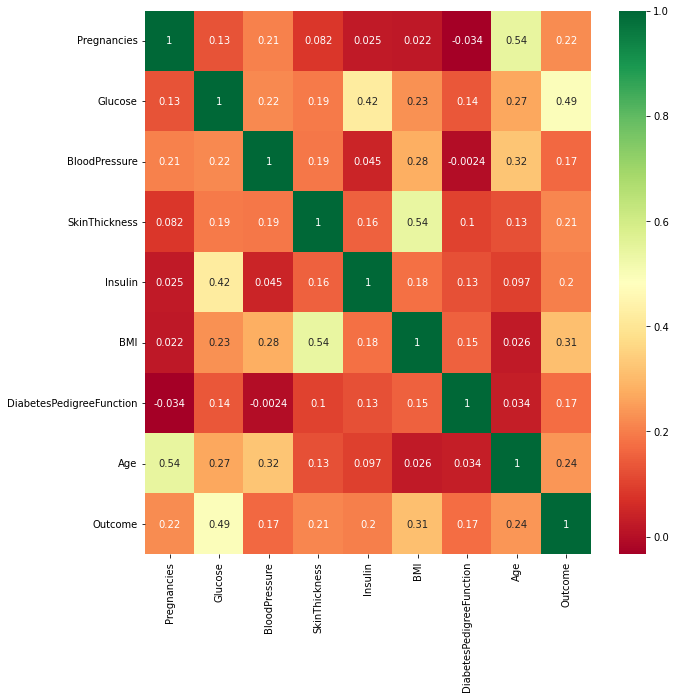

In [540]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_standard.corr(), annot=True, cmap="RdYlGn")
plt.show()

Values that have some correlation with outcome:

In [541]:
correlation_var = ['Glucose', 'BMI', 'Insulin']

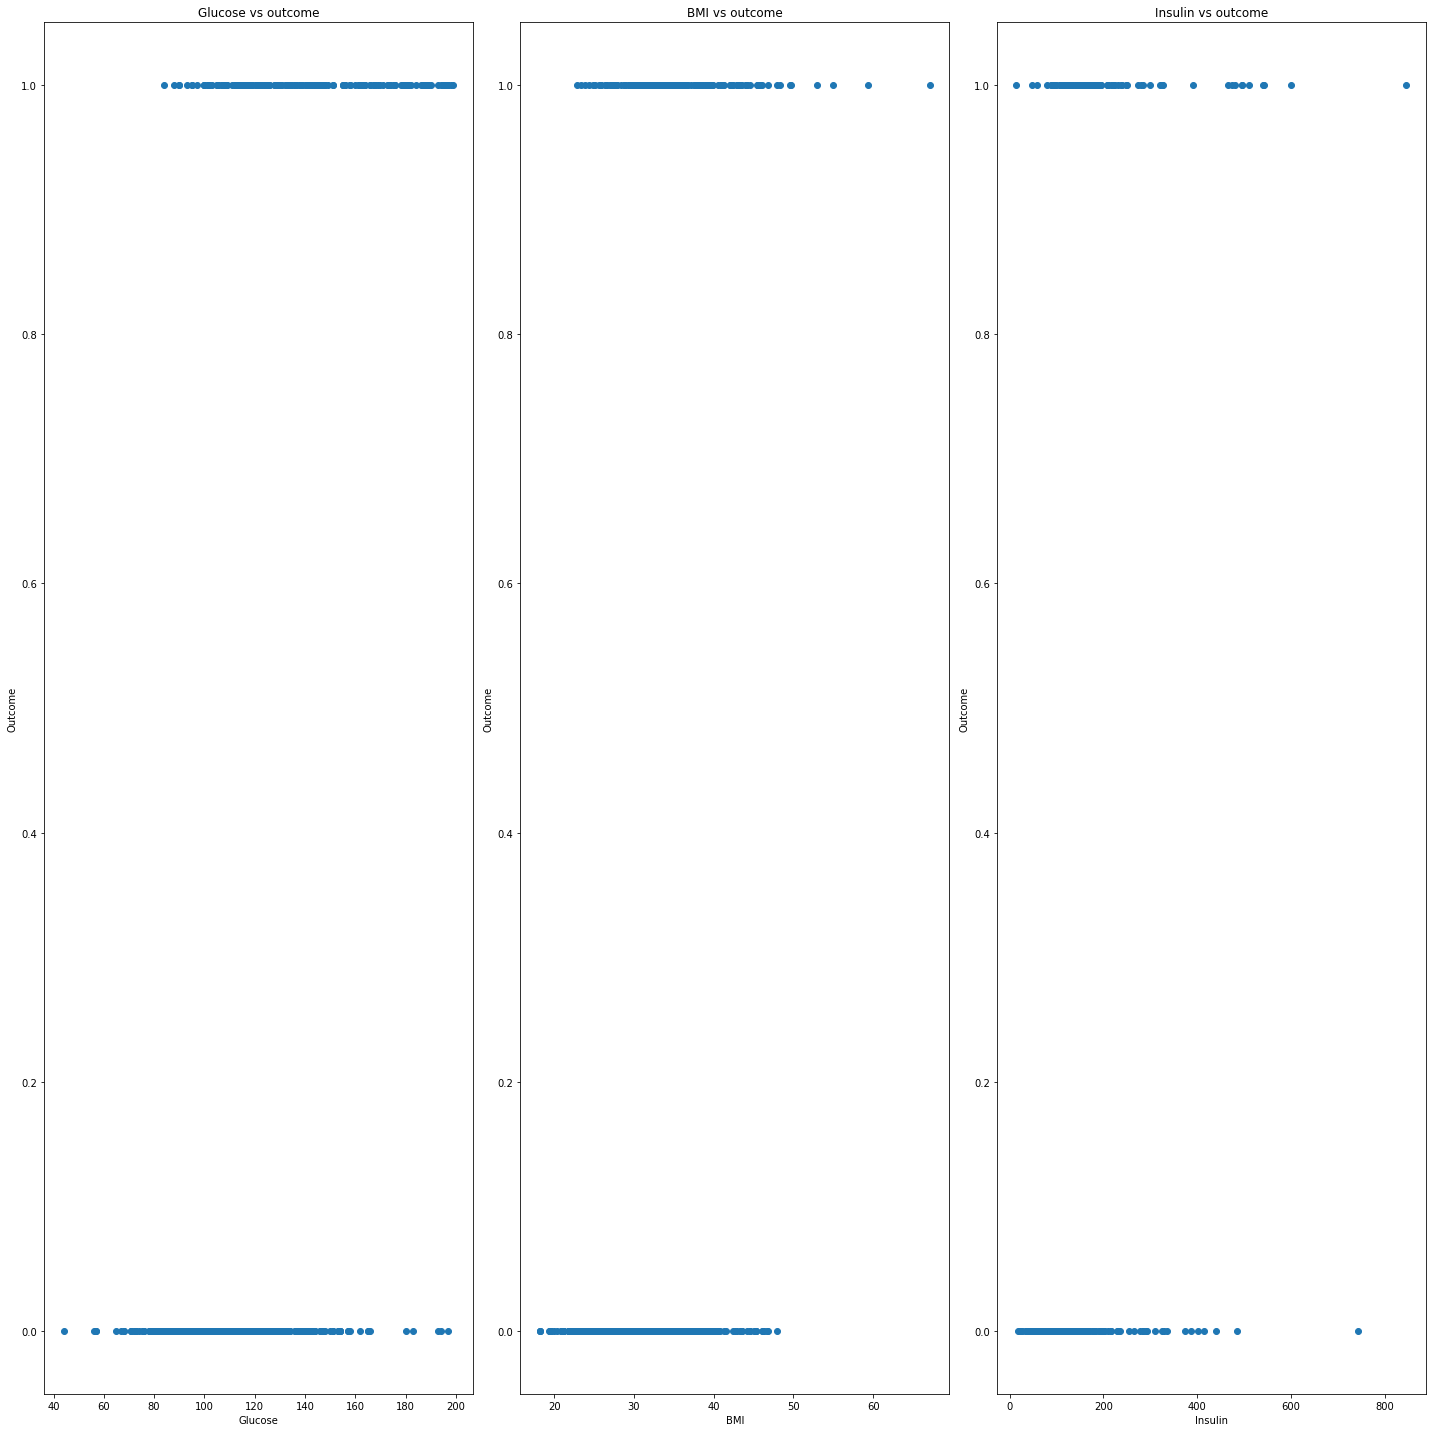

In [542]:
fig, ax = plt.subplots(1, 3, figsize=(20, 20))

for index, col in enumerate(correlation_var):
    ax[index].scatter(x=df_train[col], y=df_train['Outcome'])
    ax[index].set_xlabel(col), ax[index].set_ylabel('Outcome'), ax[index].set_title(f'{col} vs outcome')
    
plt.tight_layout()

<a id="4"></a> <br>
## 4) Linear Model

In [543]:
y_train = df_train.pop('Outcome')
X_train = df_train

In [598]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [544]:
X_train_1 = X_train['Glucose']

In [545]:
# Add constant
X_train_1c = sm.add_constant(X_train_1)

# First fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [546]:
lr_1.params

const     -0.648866
Glucose    0.008192
dtype: float64

In [585]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [547]:
X_train_1c

,const,Glucose
334,1.0,95.0
139,1.0,105.0
485,1.0,135.0
547,1.0,131.0
18,1.0,103.0
...,...,...
71,1.0,139.0
106,1.0,96.0
270,1.0,101.0
435,1.0,141.0


In [548]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           4.55e-38
Time:                        21:59:21   Log-Likelihood:                -280.88
No. Observations:                 537   AIC:                             565.8
Df Residuals:                     535   BIC:                             574.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6489      0.074     -8.814      0.000      -0.793      -0.504
Glucose        0.0082      0.001     13.978      0.000       0.007       0.009
==============================================================================
Omnibus:                       41.626   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.122
Skew:                           0.503   Prob(JB):                     1.06e-07
Kurtosis:                       2.348   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R_squared = 0.267, continue with more correlated variables to see if R-squared increases.

In [549]:
X_train_2 = X_train[['Glucose', 'BMI']]

In [550]:
X_train_2.head()

,Glucose,BMI
334,95.0,23.9
139,105.0,36.9
485,135.0,42.3
547,131.0,33.1
18,103.0,43.3


In [551]:
# Add constant
X_train_2c = sm.add_constant(X_train_2)

# Create second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [552]:
lr_2.params

const     -1.053920
Glucose    0.007323
BMI        0.015832
dtype: float64

In [553]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           4.47e-45
Time:                        21:59:21   Log-Likelihood:                -261.77
No. Observations:                 537   AIC:                             529.5
Df Residuals:                     534   BIC:                             542.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0539      0.096    -10.975      0.000      -1.243      -0.865
Glucose        0.0073      0.001     12.566      0.000       0.006       0.008
BMI            0.0158      0.003      6.277      0.000       0.011       0.021
==============================================================================
Omnibus:                       30.561   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.459
Skew:                           0.416   Prob(JB):                     8.05e-06
Kurtosis:                       2.402   Cond. No.                         730.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="5"></a> <br>
## 5) Using RandomForestClassifier, Confusion Matrix, and Accuracy Score

In [589]:
y_test = df_test.pop('Outcome')
X_test = df_test.to_numpy()

In [592]:
print(y_train[:5], X_test[:5])

334    0
139    0
485    1
547    0
18     0
Name: Outcome, dtype: int64      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
668     0.639947 -0.777694      -1.190090       0.442995  0.571411  0.224838   
324    -0.547919 -0.317447       0.216174       0.329171 -0.181541  0.472265   
624    -0.547919 -0.448946      -0.693761      -0.012301 -0.181541 -0.240908   
690     1.233880 -0.481821       0.629782      -0.012301 -0.181541 -1.143291   
473     0.936914  0.471547       1.456996      -0.012301 -0.181541 -0.371899   

     DiabetesPedigreeFunction       Age  
668                 -0.126471  0.830381  
324                 -0.978145 -1.041549  
624                 -0.947944 -1.041549  
690                  1.160099  0.064591  
473                 -0.790898  1.425995  


In [599]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [600]:
y_pred = rfc.predict(X_test)
r2_score(y_test, y_pred)

-0.5298013245033117

In [603]:
print(accuracy_score(y_test, y_pred))

0.6536796536796536


In [602]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



C:\Users\Memo\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Memo\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Memo\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
